# Data Visualization with Seaborn

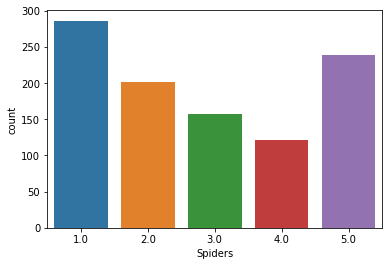

In [21]:
# Import Matplotlib, pandas, and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame from csv file
survey_data = pd.read_csv('young-people-survey-responses.csv')

# Create a count plot with "Spiders" on the x-axis
sns.countplot(x="Spiders", data=survey_data)

# Display the plot
plt.show()

## Adding a third variable with hue
### Hue and scatterplots

In [4]:
student_data = pd.read_csv('student-alcohol-consumption.csv', index_col=0)
student_data.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


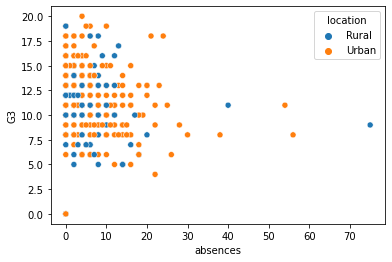

In [5]:
# Change the legend order in the scatter plot
sns.scatterplot(x="absences", y="G3", 
                data=student_data, 
                hue="location", hue_order=["Rural", "Urban"])

# Show plot
plt.show()

### Hue and count plots

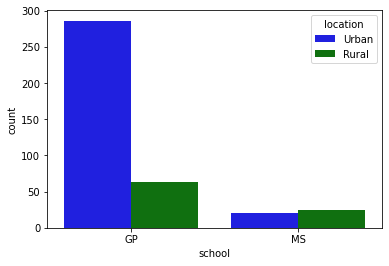

In [6]:
# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

# Create a count plot of school with location subgroups
sns.countplot(x="school", data=student_data, hue="location",palette=palette_colors)


# Display plot
plt.show()

# Visualizing Two Quantitative Variables
### Creating subplots with col and row

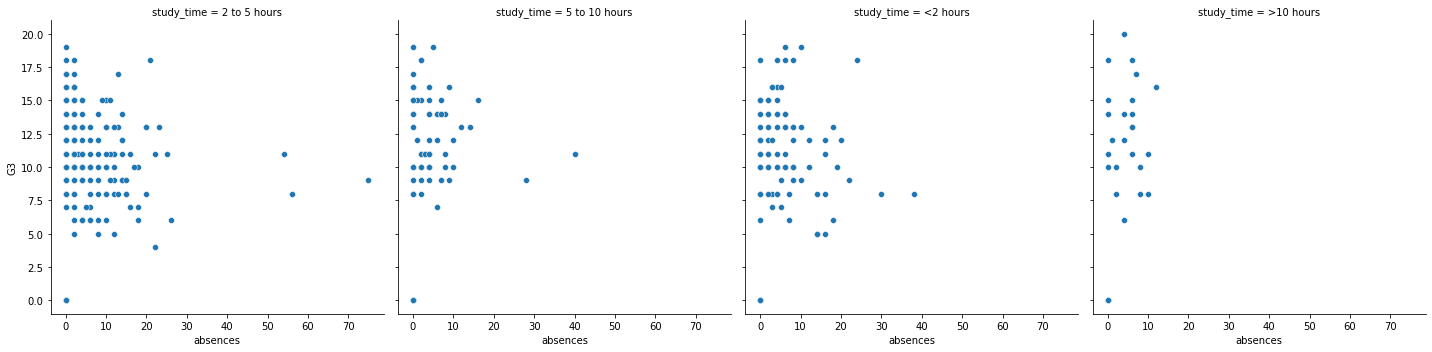

In [7]:
# Change to make subplots based on study time
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter", col="study_time")

# Show plot
plt.show()

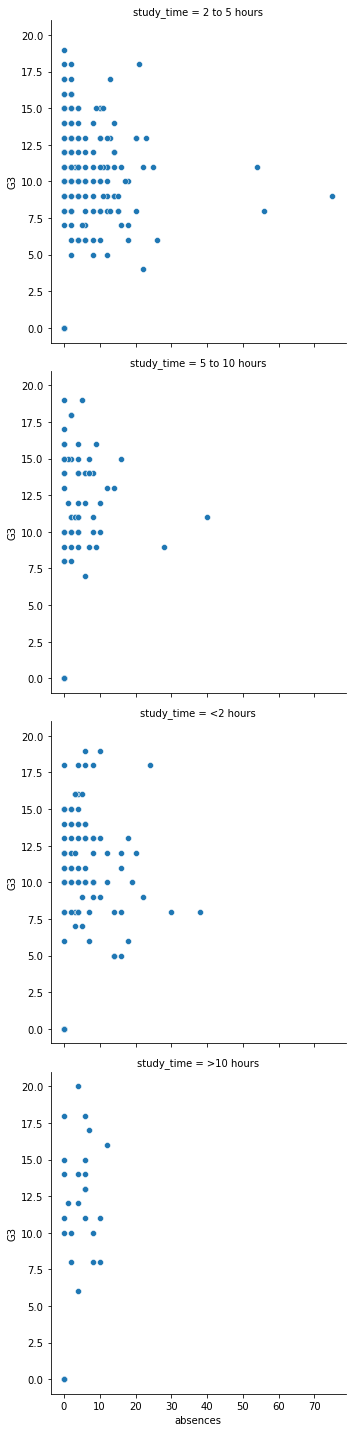

In [8]:
# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter", 
            row="study_time")

# Show plot
plt.show()

### Creating two-factor subplots

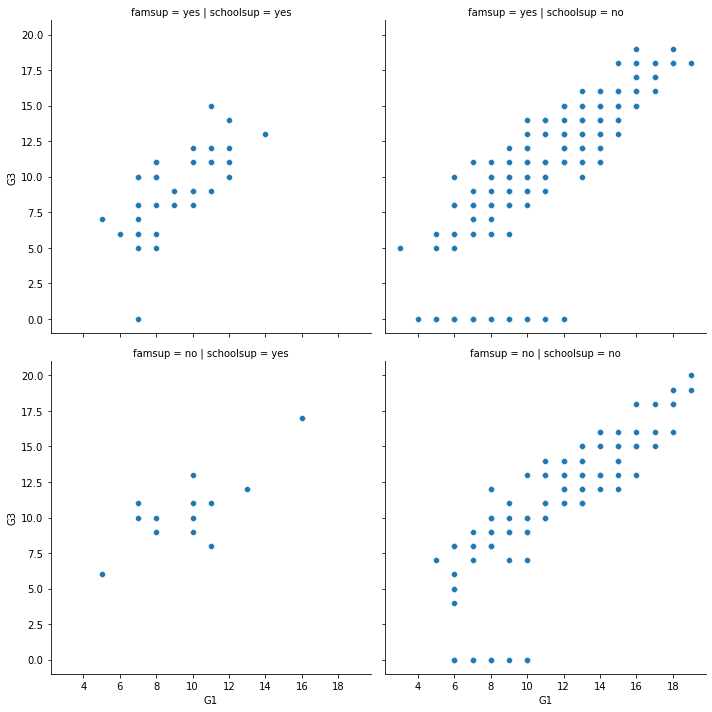

In [10]:
# Adjust further to add subplots based on family support
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter", 
            col="schoolsup",
            col_order=["yes", "no"],
            row="famsup",
            row_order=["yes", "no"])

# Show plot
plt.show()

## Customizing scatter plots
### Changing the size of scatter plot points

In [12]:
mpg = pd.read_csv('mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


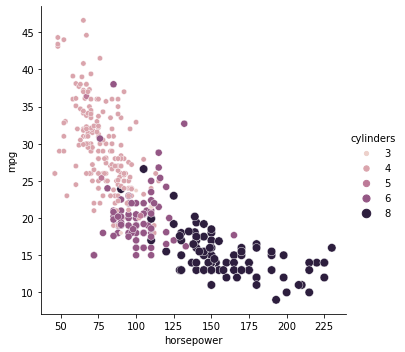

In [14]:
# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders", hue="cylinders")
# Show plot
plt.show()

### Changing the style of scatter plot points

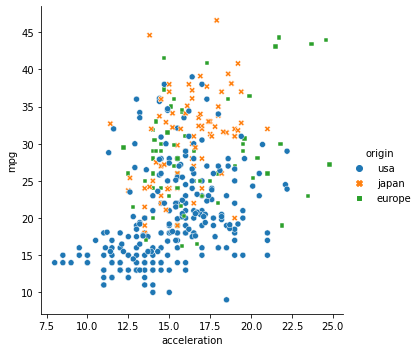

In [16]:
# Create a scatter plot of acceleration vs. mpg
sns.relplot(x="acceleration", y="mpg", data=mpg, kind="scatter", hue="origin",style="origin")

# Show plot
plt.show()

## Line plots
### Interpreting line plots

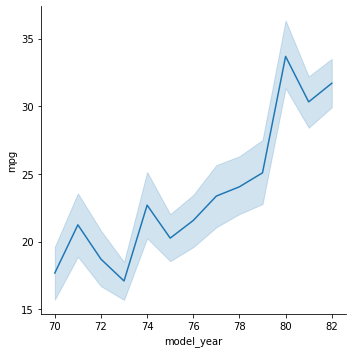

In [17]:
# Create line plot
sns.relplot(x="model_year", y="mpg", data=mpg, kind="line")
# Show plot
plt.show()

> The distribution of miles per gallon is smaller in 1973 compared to 1977.

### Visualizing standard deviation with line plots

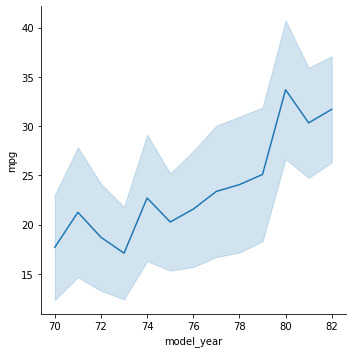

In [18]:
# Make the shaded area show the standard deviation
sns.relplot(x="model_year", y="mpg",
            data=mpg, kind="line", ci="sd")

# Show plot
plt.show()

> This shows the distribution of miles per gallon for all the cars in each year.

### Plotting subgroups in line plots

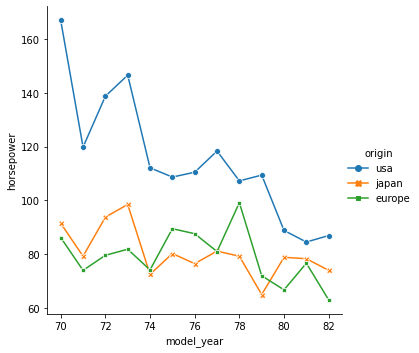

In [19]:
# Add markers and make each line have the same style
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", 
            hue="origin", markers=True, dashes=False)
plt.show()

# Visualizing a Categorical and a Quantitative Variable
## Count plots and bar plots
### Count plots

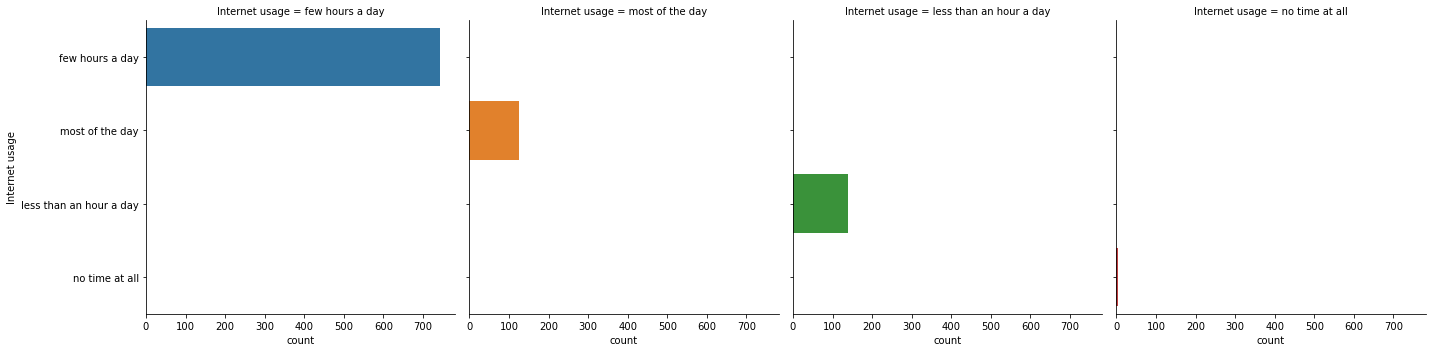

In [24]:
# Separate into column subplots based on age category
sns.catplot(y="Internet usage", data=survey_data,
            kind="count", col="Internet usage")

# Show plot
plt.show()

### Bar plots with percentages

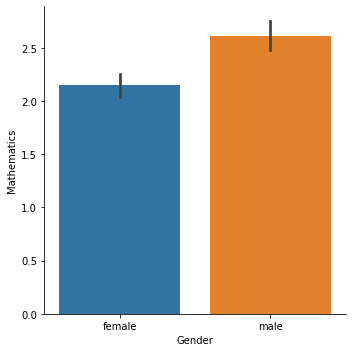

In [26]:
# Create a bar plot of interest in math, separated by gender
sns.catplot(x="Gender", y="Mathematics", data=survey_data, kind="bar")

# Show plot
plt.show()

### Customizing bar plots

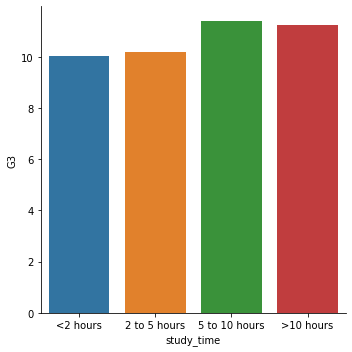

In [27]:
# List of categories from lowest to highest
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

# Turn off the confidence intervals
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            order=category_order, ci=None)

# Show plot
plt.show()

## Box plots

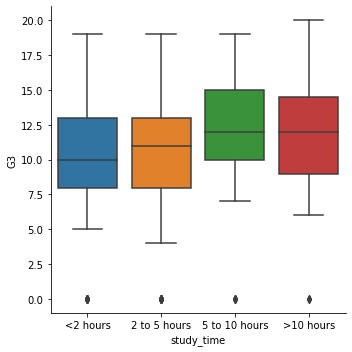

In [29]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(x="study_time", y="G3", data=student_data, kind="box", order=study_time_order)

# Show plot
plt.show()

> The median grade among students studying less than 2 hours is 10.0.

### Omitting outliers

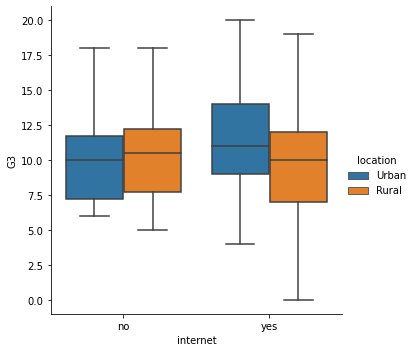

In [30]:
# Create a box plot with subgroups and omit the outliers
sns.catplot(x="internet", y="G3", data=student_data, kind="box", sym="", hue="location")

# Show plot
plt.show()

### Adjusting the whiskers

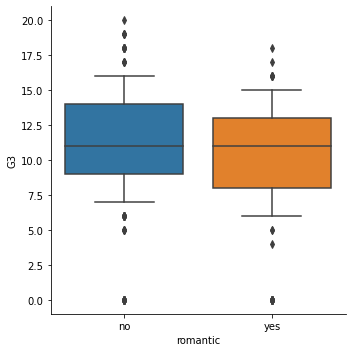

In [33]:
# Set the whiskers to 0.5 * IQR
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box", whis=0.5)

# Show plot
plt.show()

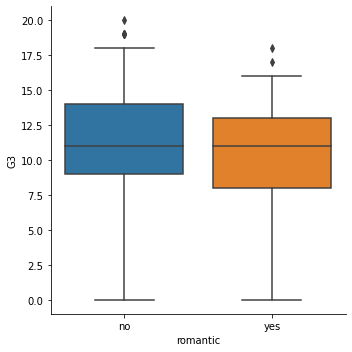

In [32]:
# Extend the whiskers to the 5th and 95th percentile
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[5,95])

# Show plot
plt.show()

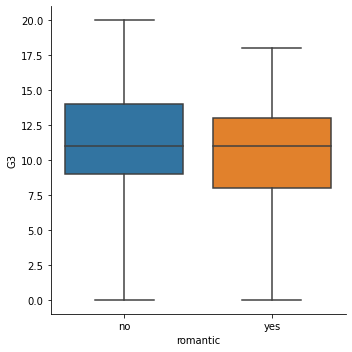

In [31]:
# Set the whiskers at the min and max values
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[0, 100])

# Show plot
plt.show()

## Point plots

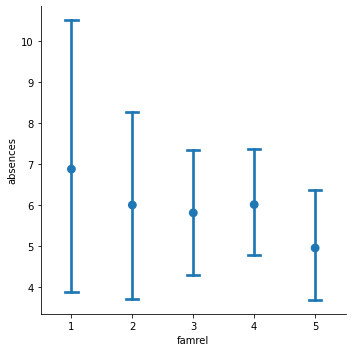

In [34]:
# Remove the lines joining the points
sns.catplot(x="famrel", y="absences",
			data=student_data,
            kind="point",
            capsize=0.2, join=False)
            
# Show plot
plt.show()

### Point plots with subgroups

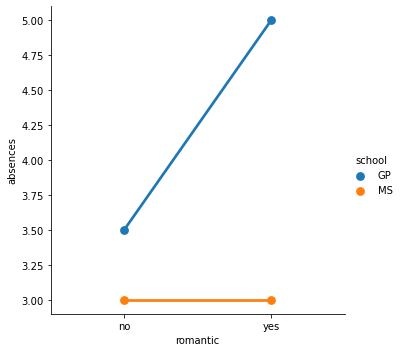

In [35]:
# Import median function from numpy
from numpy import median

# Plot the median number of absences instead of the mean
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            ci=None,
            estimator=median)

# Show plot
plt.show()

# Customizing Seaborn Plots
## Changing plot style and color

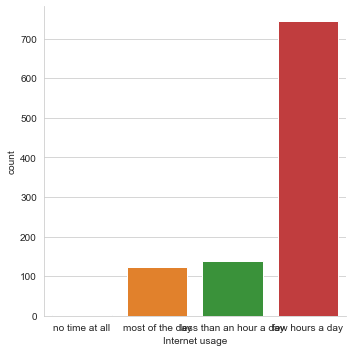

In [52]:
# Set the style to "whitegrid"
sns.set_style("whitegrid")
# Create a count plot of survey responses
category_order = ["no time at all", "most of the day", 
                  "less than an hour a day", "few hours a day"]
sns.catplot(x="Internet usage", 
            data=survey_data, 
            kind="count", 
            order=category_order)
# Show plot
plt.show()

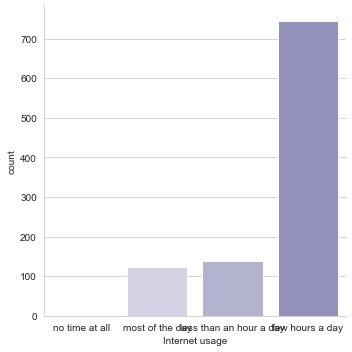

In [54]:
# Set the style to "whitegrid"
sns.set_style("whitegrid")
sns.set_palette("Purples")
# Create a count plot of survey responses
category_order = ["no time at all", "most of the day", 
                  "less than an hour a day", "few hours a day"]
sns.catplot(x="Internet usage", 
            data=survey_data, 
            kind="count", 
            order=category_order)
# Show plot
plt.show()

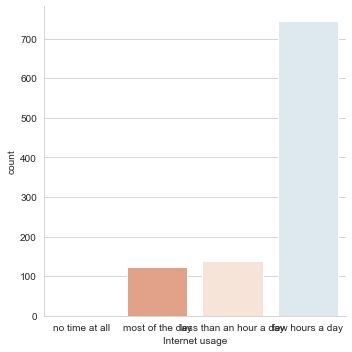

In [56]:
# Set the style to "whitegrid"
sns.set_style("whitegrid")
sns.set_palette("RdBu")
# Create a count plot of survey responses
category_order = ["no time at all", "most of the day", 
                  "less than an hour a day", "few hours a day"]
sns.catplot(x="Internet usage", 
            data=survey_data, 
            kind="count", 
            order=category_order)
# Show plot
plt.show()

### Changing the scale

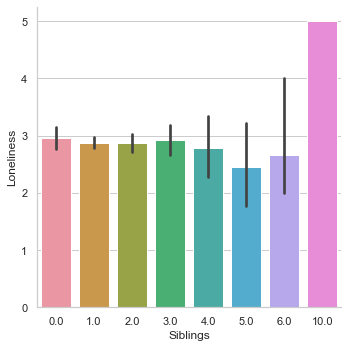

In [60]:
# Change the context to "notebook"
sns.set_context("notebook")

# Create bar plot
sns.catplot(x="Siblings", y="Loneliness",
            data=survey_data, kind="bar")

# Show plot
plt.show()

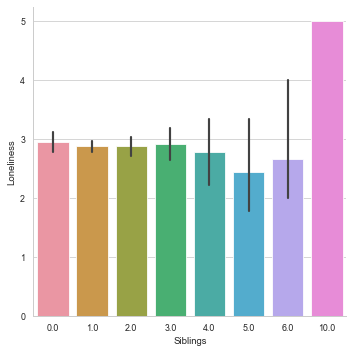

In [61]:
# Change the context to "notebook"
sns.set_context("paper")

# Create bar plot
sns.catplot(x="Siblings", y="Loneliness",
            data=survey_data, kind="bar")

# Show plot
plt.show()

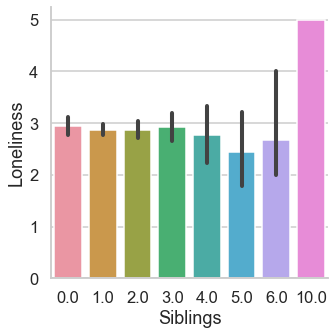

In [62]:
# Change the context to "notebook"
sns.set_context("talk")

# Create bar plot
sns.catplot(x="Siblings", y="Loneliness",
            data=survey_data, kind="bar")

# Show plot
plt.show()

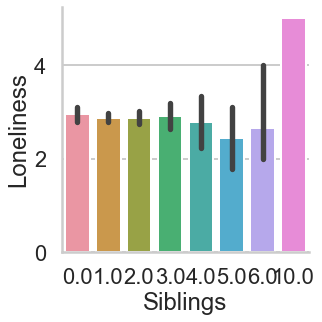

In [64]:
# Change the context to "notebook"
sns.set_context("poster")

# Create bar plot
sns.catplot(x="Siblings", y="Loneliness",
            data=survey_data, kind="bar")

# Show plot
plt.show()

### Using a custom palette

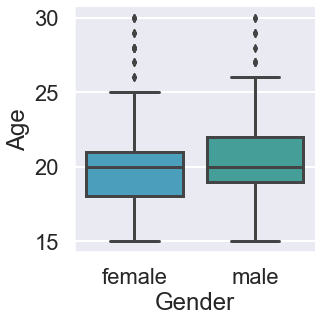

In [65]:
# Set the style to "darkgrid"
sns.set_style("darkgrid")

# Set a custom color palette
sns.set_palette(["#39A7D0", "#36ADA4"])

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age", 
            data=survey_data, kind="box")

# Show plot
plt.show()

## Adding titles and labels: Part 1
### FacetGrids vs. AxesSubplots

seaborn.axisgrid.FacetGrid

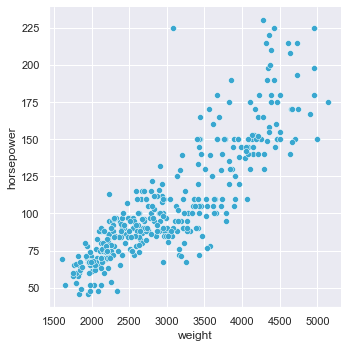

In [71]:
# Change the context to "notebook"
sns.set_context("notebook")
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Identify plot type
type_of_g = type(g)
type_of_g

### Adding a title to a FacetGrid object

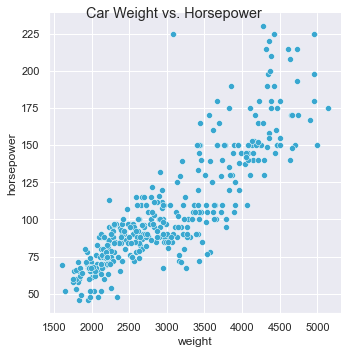

In [72]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle("Car Weight vs. Horsepower")

# Show plot
plt.show()

### Adding a title and axis labels

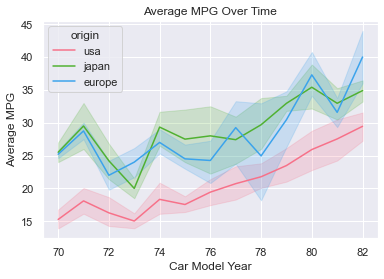

In [73]:
# Create line plot
g = sns.lineplot(x="model_year", y="mpg", 
                 data=mpg,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Add x-axis and y-axis labels
g.set(xlabel="Car Model Year", ylabel="Average MPG")


# Show plot
plt.show()

### Rotating x-tick labels

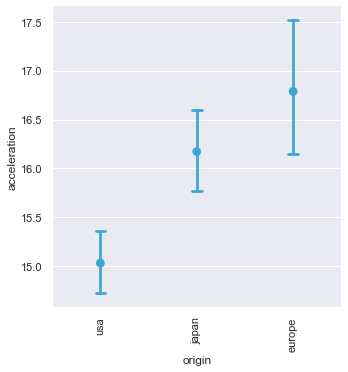

In [74]:
# Create point plot
sns.catplot(x="origin", 
            y="acceleration", 
            data=mpg, 
            kind="point", 
            join=False, 
            capsize=0.1)

# Rotate x-tick labels
plt.xticks(rotation=90)

# Show plot
plt.show()

## Putting it all together
### Box plot with subgroups

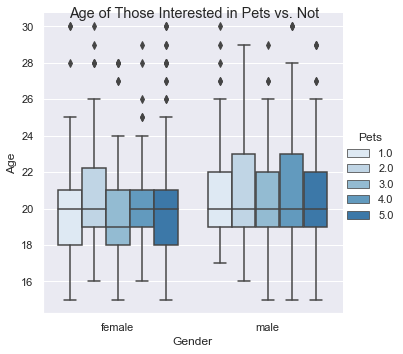

In [77]:
# Set palette to "Blues"
sns.set_palette("Blues")

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=survey_data, 
                kind="box", hue="Pets")

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle("Age of Those Interested in Pets vs. Not")
plt.show()

### Bar plot with subgroups and subplots

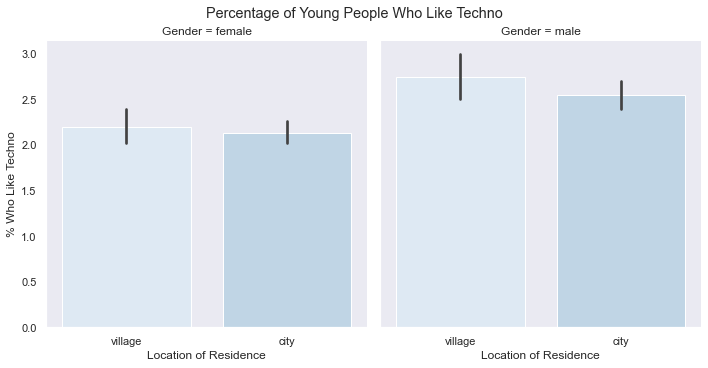

In [78]:
# Set the figure style to "dark"
sns.set_style("dark")

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Techno", 
                data=survey_data, kind="bar",
                col="Gender")

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", 
       ylabel="% Who Like Techno")

# Show plot
plt.show()